<a href="https://colab.research.google.com/github/itsharshsaini/GoldPricePrediction/blob/main/GoldPricePridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the Libaries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import sklearn.metrics as metrics






Data Collection and Processing


In [16]:
# loading the csv data to a Pandas DataFrame
gold_data= pd.read_csv('/content/gld_price_data.csv')

In [17]:
# print first 5 rows in the dataframees
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [18]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [19]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [20]:
# getting some basic informations about the data
gold_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation
2.Negative Correlation

In [23]:
correlation = gold_data.corr()

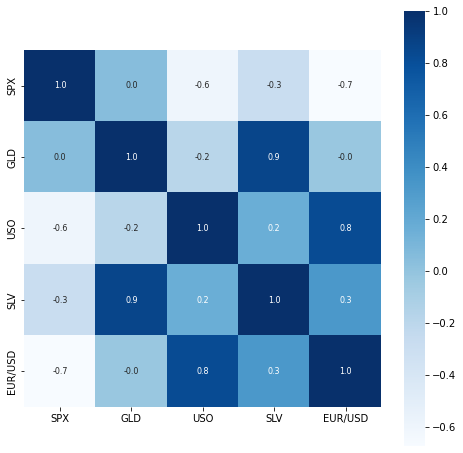

In [24]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8)) 
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [25]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


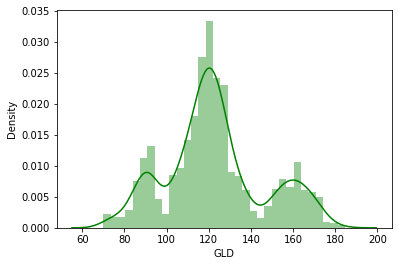

In [26]:
# checking the distributon of the GLD price
sns.distplot(gold_data['GLD'],color='green')

Splitting the features and Target

In [27]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training:
Random Forest Regressor

In [31]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [33]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [34]:
print(test_data_prediction)

[168.34129943  81.89819985 116.19080019 127.60120053 120.78550131
 154.6749972  150.23299743 126.04290053 117.58929866 125.880001
 116.53230094 171.79040117 142.19459862 167.29309857 115.09859974
 117.45150046 138.39700364 170.23110083 159.0633027  160.89449894
 155.1755003  124.99700006 175.50559975 156.78060351 125.09490026
  93.99929932  77.97979992 120.54890015 119.05299932 167.39529986
  88.14370036 125.20680037  90.99540033 117.71210028 121.15049914
 136.35060095 115.58180104 115.03520093 149.1091998  107.27610063
 104.59400242  86.98259782 126.44960024 118.05829956 153.68999849
 119.55700009 108.35229972 108.31739828  93.13120043 127.09309782
  74.85180046 113.65889955 121.27120045 111.03199933 118.855099
 120.76219927 160.15369914 167.58350065 146.84099684  86.04089877
  94.35760023  86.89989905  90.5493998  119.12360074 126.33200056
 127.54430028 169.89129972 122.307799   117.32649882  98.74740041
 168.54590137 142.69839821 131.94850256 121.23580204 121.21609934
 119.80480077 

In [35]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891059897319313


Compare the Actual Values and Predicted Values in a plot

In [36]:
Y_test = list(Y_test)

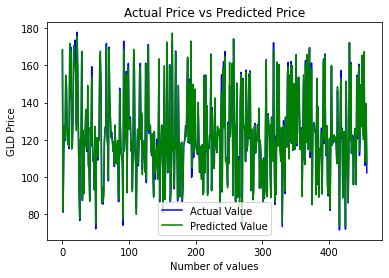

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()